<a href="https://colab.research.google.com/github/arun-arunisto/OpenCVTutorial/blob/todo/ComputerVisionTutorial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h3>Basic Image Manipulations</h3>
<p>Like
<ul>
<li>Accessing and manipulating images pixels</li>
<li>Image resizing</li>
<li>Cropping</li>
<li>Flipping</li>
</ul></p>

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

[[12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12 12]
 ...
 [12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12 12]]


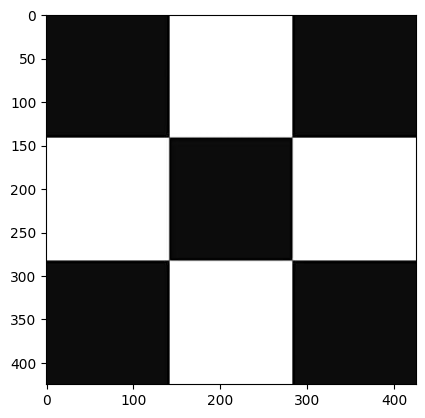

In [3]:
check_img = cv.imread("/content/drive/MyDrive/ComputerVisionTutorial/ImagesToPractise/check_board.jpg", 0)
plt.imshow(check_img, cmap="gray")
print(check_img)

<h2>Accessing individual pixels</h2>
<p>For accessing any pixel in a numpy matrix we have to use matrix notation matrix[r, c] <b>r</b> is the row number and <b>c</b> is column number</p>

In [4]:
print(check_img[0, 0]) #first pixel of the first black box
print(check_img[0, 6]) #first white pixel to the right of the firstblackbox

12
12


<h3>Modifying image pixels</h3>
<p>We can modify the intensity values of pixels in the same manner as above</p>

[[12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12 12]
 [12 12  0 ... 12 12 12]
 ...
 [12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12 12]
 [12 12 12 ... 12 12 12]]


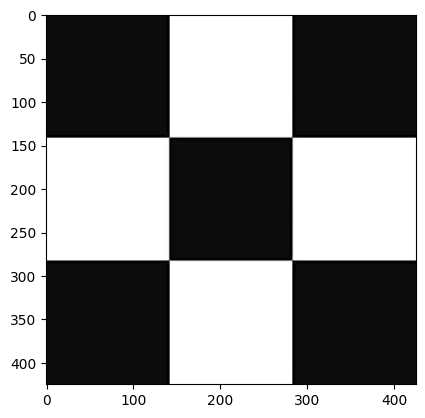

In [9]:
check_img_copy = check_img.copy()
check_img_copy[2, 2] = 0
check_img_copy[2, 3] = 0
check_img_copy[3, 2] = 0
check_img_copy[3, 3] = 0

#same as above check_img_copy[2:3, 2:3] = 200
plt.imshow(check_img_copy, cmap="gray")
print(check_img_copy)

<h2>Cropping Image</h2>
<p>to crop an image select the specific (pixel region of the image)</p>

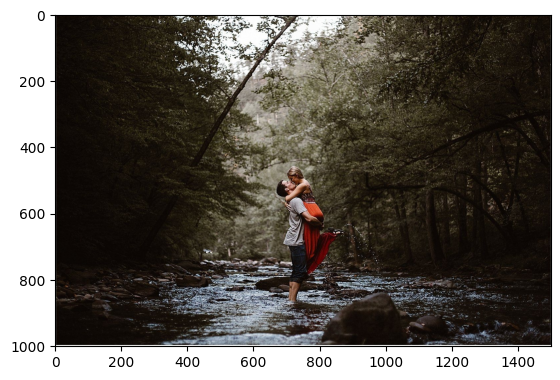

In [10]:
couple_img = cv.imread("/content/drive/MyDrive/ComputerVisionTutorial/ImagesToPractise/couples.jpg")
couple_img_rgb = cv.cvtColor(couple_img, cv.COLOR_BGR2RGB)
plt.imshow(couple_img_rgb)

<h2>Cropping out the speccific region using pixels</h2>

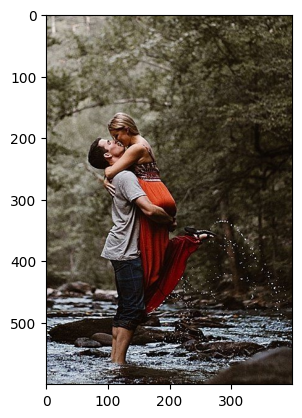

In [13]:
crop_region = couple_img_rgb[300:900, 600:1000]
plt.imshow(crop_region)

<h2>Resizing images</h2>
<p>resizing images using resize function</p>
<h3>Function Syntax</h3>
<p><b>dst = resize(src, dsize[, dst[, fx[, fy[, interploation]]]])</b>
<br><b>dst</b> : output image<br><b>dsize</b> : it's a non-zero or the size computed from src.size()<br><b>fx and fy </b>: the type of dst is the same as of src</p>
<h4>The function has 2 required arguments</h4>
<p>
<ol>
<li><b>src</b> : input image</li>
<li><b>dsize</b> : output image size</li>
</ol>
optional arguments that are often include:
<ol>
<li><b>fx</b> : dsize.width/src.rows</li>
<li><b>fy</b> : dsize.height/src.rows</li>
</ol></p>

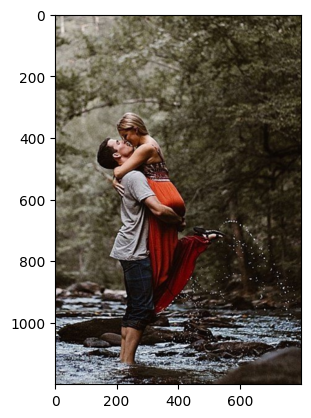

In [24]:
#method 1 specifying scaling factor using fx and fy
couple_img_resize_2x = cv.resize(crop_region, None, fx=2, fy=2)
plt.imshow(couple_img_resize_2x)

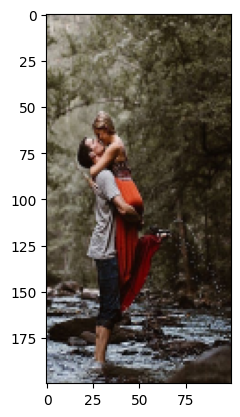

In [21]:
#method2 specifying exact size of the output image
width = 100
height = 200
dimension = (width, height)
couple_img_resize = cv.resize(crop_region, dsize=dimension, interpolation=cv.INTER_AREA)
plt.imshow(couple_img_resize)

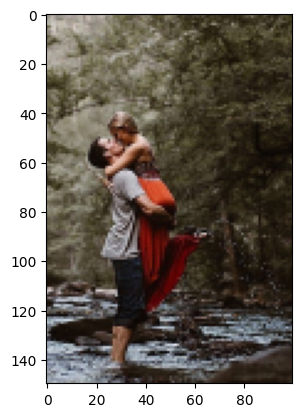

In [22]:
#reesizing while aspect ratio
#using dsize
width = 100
aspect_ratio = width/crop_region.shape[1]
height = int(crop_region.shape[0]*aspect_ratio)
dimension = (width, height)
couple_img_resize = cv.resize(crop_region, dsize=dimension, interpolation=cv.INTER_AREA)
plt.imshow(couple_img_resize)

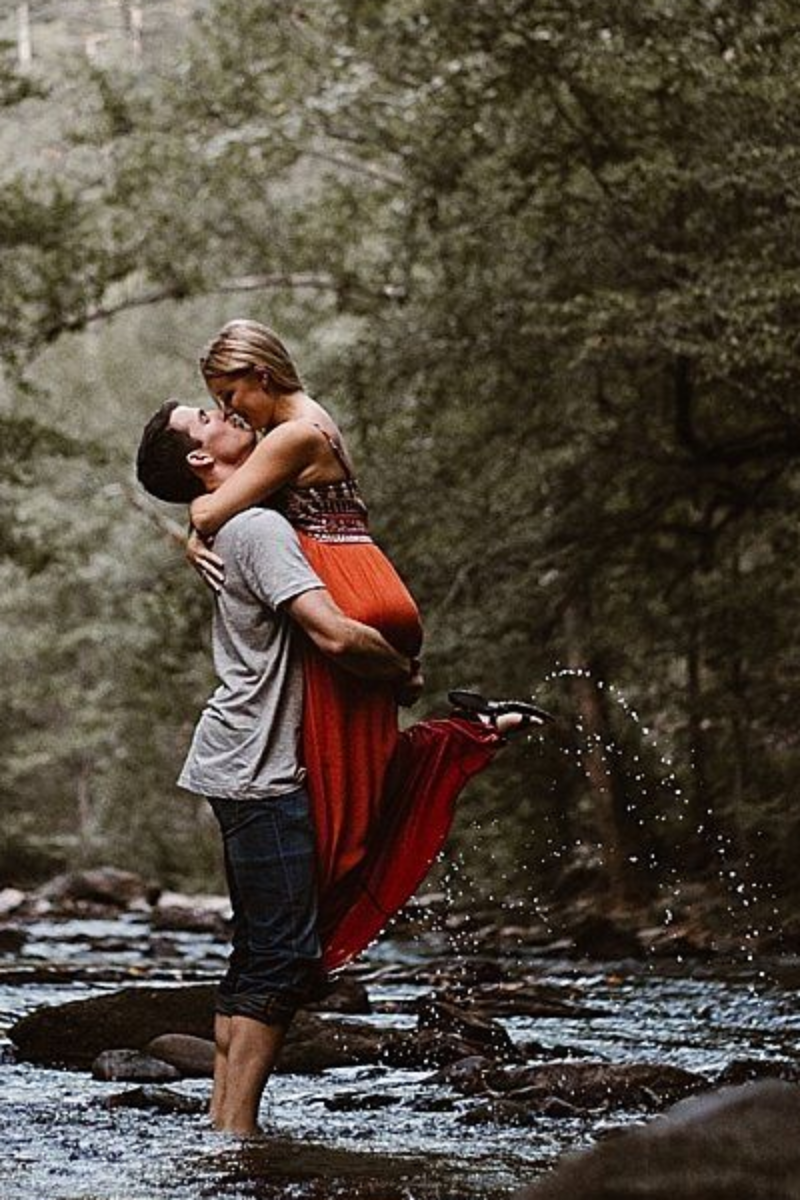

In [25]:
#showing thr resized image
resized_crop_region = cv.cvtColor(couple_img_resize_2x, cv.COLOR_RGB2BGR)
#asving the file
cv.imwrite("couple_crop_img.png", resized_crop_region)

#DisplayingImage
Image(filename="couple_crop_img.png")

<h2>Image Flipping</h2>
<p>to flip an image we are using <b>flip()</b> function for that</p>
<h3>Function Syntax</h3>
<p><b>dst = cv2.flip(src, flipcode)</b>
<br>
<b>the function required two arguments</b><br>
<ol>
<li><b>src</b> : input image</li>
<li><b>flipCode</b> : a flag to specify how to flip the array: 0 means flipping around the x-axis and positivce value (for example, 1) means flipping around y-axis. Negative value (for example, -1) means flipping around both axes.</li>
</ol></p>

Text(0.5, 1.0, 'Both flip')

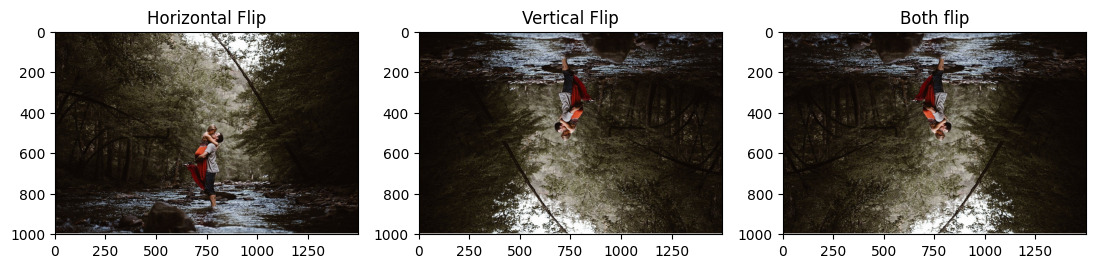

In [27]:
couple_img_flip_horizontal = cv.flip(couple_img_rgb, 1)
couple_img_flip_vertical = cv.flip(couple_img_rgb, 0)
couple_img_flip_both = cv.flip(couple_img_rgb, -1)

#show the images
plt.figure(figsize=(18, 5))
plt.subplot(141);plt.imshow(couple_img_flip_horizontal);plt.title("Horizontal Flip")
plt.subplot(142);plt.imshow(couple_img_flip_vertical);plt.title("Vertical Flip")
plt.subplot(143);plt.imshow(couple_img_flip_both);plt.title("Both flip")